In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyshtools as pysh    # pysh.__version__ = v4.10.4

---
---
# [1] Coeffs

---
## [1.1] Mars

In [2]:
mag_clm = pysh.datasets.Mars.Langlais2019()

print(mag_clm)

kind = 'real'
normalization = 'schmidt'
csphase = 1
lmax = 134
r0 (m) = 3393500.0
error_kind = None
header = None
header2 = None
name = 'Langlais2019'
units = 'nT'
year = None


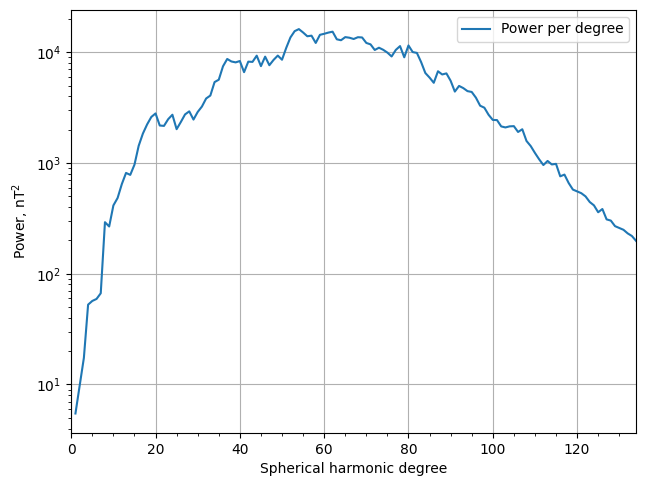

In [3]:
fig, ax = mag_clm.plot_spectrum(function='total', show=False)

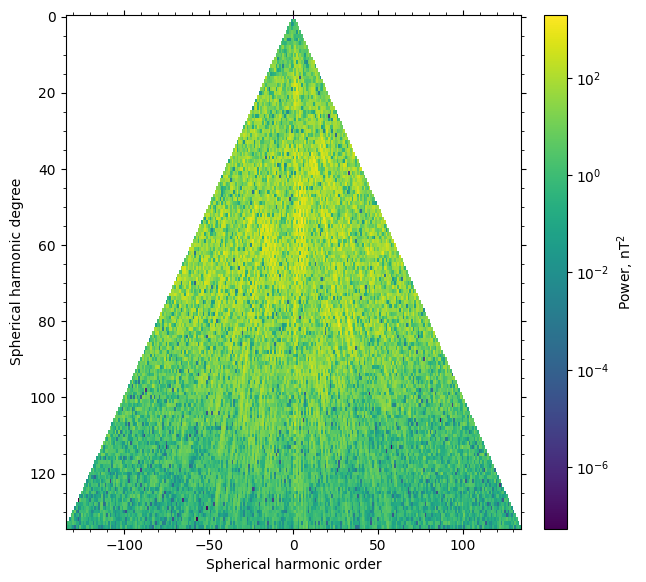

In [4]:
fig, ax = mag_clm.plot_spectrum2d(function='total', show=False)

---
## [1.2] Compare with Earth

In [5]:
earth_mag_clm = pysh.datasets.Earth.WDMAM2_800()
earth_mag_clm

kind = 'real'
normalization = 'schmidt'
csphase = 1
lmax = 800
r0 (m) = 6371200.0
error_kind = None
header = None
header2 = None
name = 'WDMAM2_800'
units = 'nT'
year = None

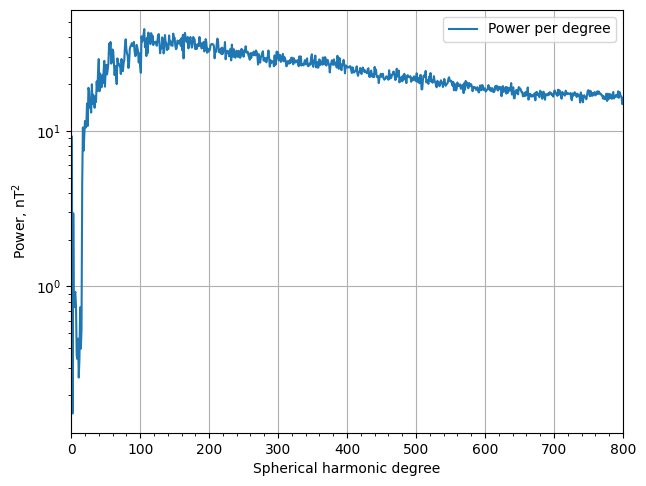

In [6]:
fig, ax = earth_mag_clm.plot_spectrum(function='total', show=False)

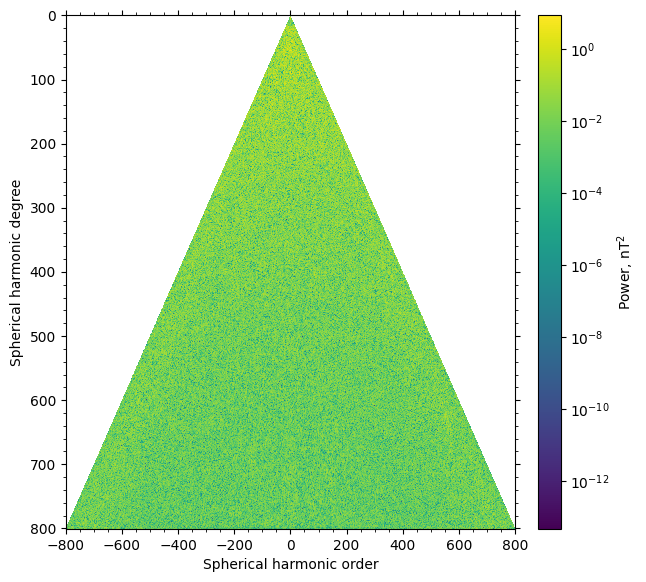

In [7]:
fig, ax = earth_mag_clm.plot_spectrum2d(function='total', show=False)

---
---
# [2] Grid

In [8]:
mag_grid = mag_clm.expand()

print(mag_grid)

grid = DH
nlat = 271
nlon = 541
n = 270
sampling = 2
extend = True
lmax = 134
lmax_calc = 134
a (m)= 3.393500e+06
f = 0.000000e+00
units (magnetic field) = 'nT'
units (potential) = 'nT m'
year = None


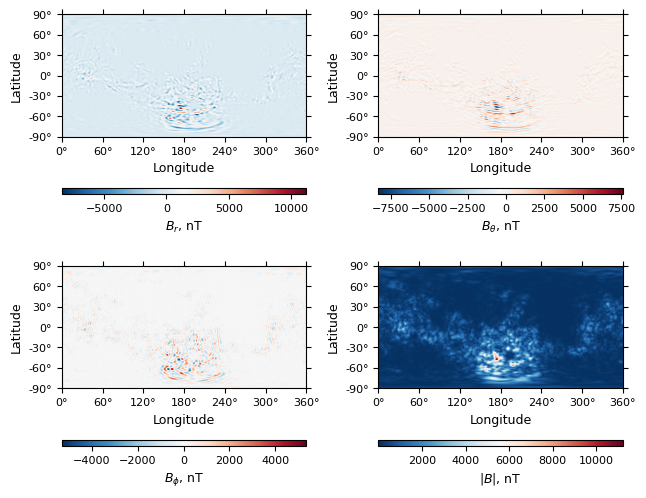

In [9]:
# pysh.utils.figstyle(figsize=(9, 6))
fig, ax = mag_grid.plot(cmap='RdBu_r', show=False)

---
---
# [3] Slepian? 

In [10]:
coords_center = [23.41598, 10.78991]
# coords_center = [48.34497, 25.20645]
radius_deg = 7

In [11]:
slepian_cap = pysh.Slepian.from_cap(
    theta = radius_deg,
    lmax = mag_grid.lmax,
    clat = coords_center[1],
    clon = coords_center[0],
)

In [12]:
slepian_cap

kind = 'cap'
theta = 7.000000 degrees
lmax = 134
nmax = 18225
nrot = 18225
shannon = 67.923193
area (radians) = 4.683391e-02
clat = 10.789910 degrees
clon = 23.415980 degrees
dj_matrix is stored

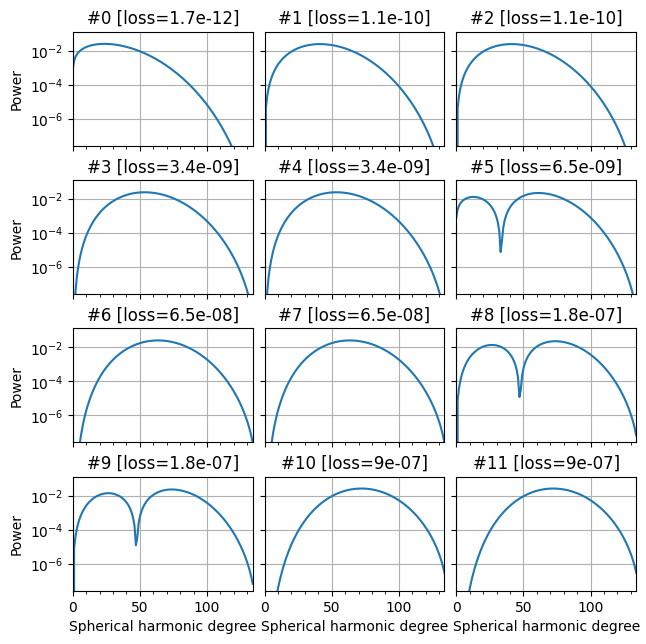

In [13]:
fig, ax = slepian_cap.plot_spectra(nmax=12, show=False)

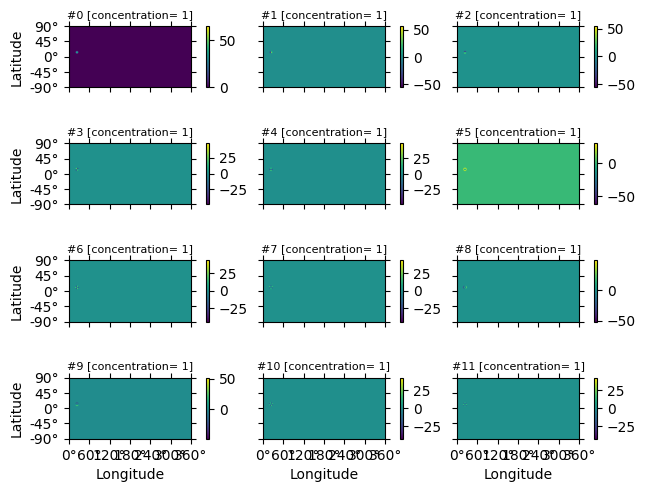

In [14]:
fig, ax = slepian_cap.plot(
    nmax = 12, 
    colorbar = 'right', 
    show = False, 
)

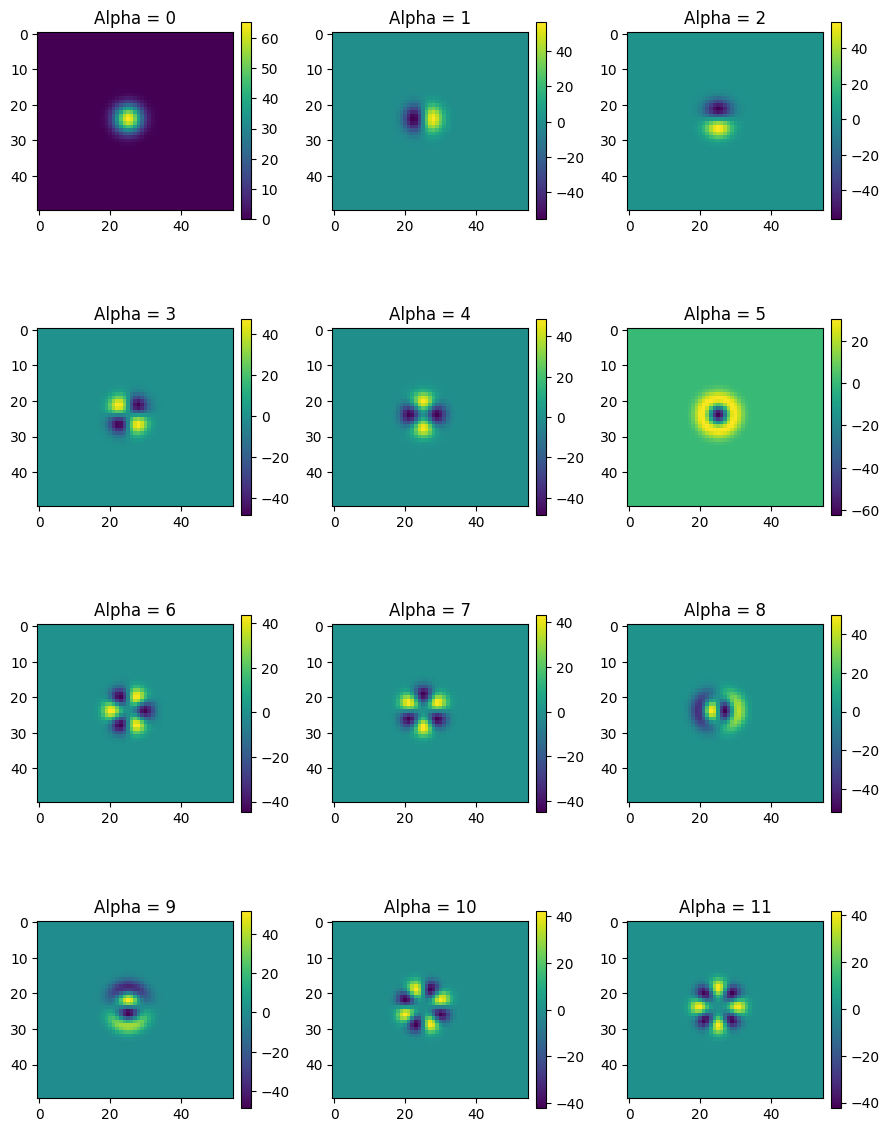

In [15]:
import matplotlib.pyplot as plt

# Number of plots you want
n_plots = 12  # Adjust this number as needed

# Define the starting value of alpha
alpha = 0

# Create a figure to hold all subplots
fig, axs = plt.subplots(nrows=(n_plots // 3 + (n_plots % 3 > 0)), ncols=3, figsize=(9, 12))  # Adjust the figsize to better suit your data

# Flatten the array of axes to make iterating easier
axs = axs.flatten()

for i in range(n_plots):
    # Assuming slepian_cap.to_shgrid(alpha=alpha).to_array() returns a 2D array
    data = slepian_cap.to_shgrid(alpha=alpha).to_array()[95:145, 10:65]
    im = axs[i].imshow(data)
    axs[i].set_title(f'Alpha = {alpha}')
    # Create colorbar matching the height of the plot
    cbar = fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04)
    alpha += 1

# Hide unused axes if n_plots is not a multiple of 3
for ax in axs[n_plots:]:
    ax.set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


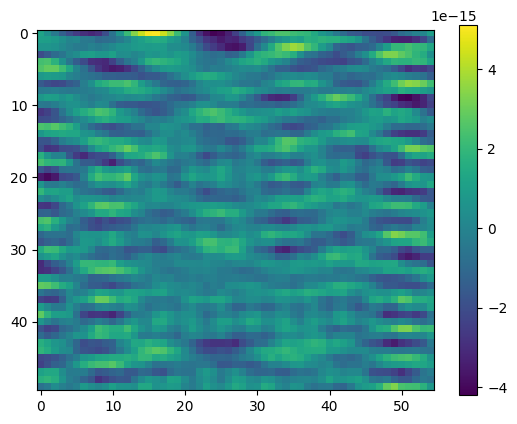

In [16]:
alpha = (mag_clm.lmax+1)**2 - 1
# plt.imshow(slepian_cap.to_shgrid(alpha=alpha).to_array()[95:145,10:65])
plt.imshow(slepian_cap.to_shgrid(alpha=alpha).to_array()[95:145,10:65])
plt.colorbar()

In [17]:
alpha

18224

---
---
# [4] Apply Slepian

In [18]:
slepian_clm = slepian_cap.expand(flm=mag_clm)
# "Return the Slepian expansion coefficients of the input function."

In [19]:
slepian_clm

nmax = 18225
lmax = 134
name = None

Slepian functions:
kind = 'cap'
theta = 7.000000 degrees
lmax = 134
nmax = 18225
nrot = 18225
shannon = 67.923193
area (radians) = 4.683391e-02
clat = 10.789910 degrees
clon = 23.415980 degrees
dj_matrix is stored

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Spherical harmonic degree', ylabel='Power'>)

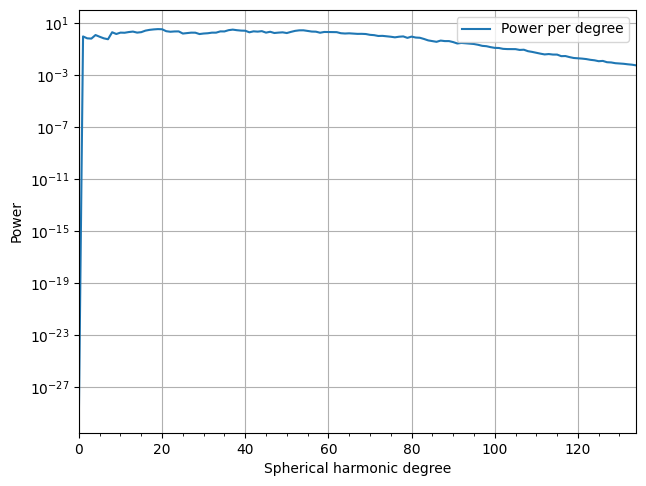

In [20]:
slepian_clm.plot_spectrum(show=False)

In [21]:
help(slepian_clm)

Help on SlepianCoeffs in module pyshtools.shclasses.slepiancoeffs object:

class SlepianCoeffs(builtins.object)
 |  SlepianCoeffs(falpha, galpha, name=None, copy=True)
 |  
 |  Class for Slepian expansion coefficients.
 |  
 |  The SlepianCoeffs class is initialized by:
 |  
 |  >>>  x = Slepian.expand(flm)
 |  
 |  Each class instance defines the following class attributes:
 |  
 |  falpha          : Array of the Slepian expansion coefficients.
 |  galpha          : A Slepian class instance that contains the associated
 |                    Slepian functions.
 |  nmax            : The number of Slepian expansion coefficients.
 |  name            : The name of the dataset.
 |  
 |  Each class instance provides the following methods:
 |  
 |  expand()        : Expand the function on a grid an return an SHGrid class
 |                    instance.
 |  to_shcoeffs()   : Return the spherical harmonic coefficients of the
 |                    function as an SHCoeffs class instance.
 |  plot

In [22]:
# mag_grid.expand
help(pysh.Slepian.expand)

Help on function expand in module pyshtools.shclasses.slepian:

expand(self, flm, nmax=None)
    Return the Slepian expansion coefficients of the input function.
    
    Usage
    -----
    s = x.expand(flm, [nmax])
    
    Returns
    -------
    s : SlepianCoeff class instance
        The Slepian expansion coefficients of the input function.
    
    Parameters
    ----------
    flm : SHCoeffs class instance
        The input function to expand in Slepian functions.
    nmax : int, optional, default = (x.lmax+1)**2
        The number of Slepian expansion coefficients to compute.
    
    Notes
    -----
    The global function f is input using its spherical harmonic
    expansion coefficients flm. The expansion coefficients of the function
    f using Slepian functions g is given by
    
    f_alpha = sum_{lm}^{lmax} f_lm g(alpha)_lm



In [23]:
type(slepian_cap)

pyshtools.shclasses.slepian.SlepianCap

In [24]:
# # Define a region (e.g., a cap around a specific latitude and longitude)
# region = [latitude_center, longitude_center, angular_radius]

# # Compute Slepian functions for the region
# slepian_functions = pysh.slepian.SlepianCap(region, tapers_number)

# # Expand the regional data into the Slepian basis
# slepian_coeffs = grid.expand(slepian_functions)